In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os


In [10]:
%run ./Combine_csv.ipynb

In [11]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [12]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\World\Combined CSV\ "
suffix_dir = 'combined_world-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [13]:
today_csv

'C:\\Users\\drago\\Documents\\GitHub\\Summer-Project\\World\\Combined CSV\\combined_world-2019-06-10.csv'

In [14]:
world = pd.read_csv(today_csv)

In [16]:
world['Category'].value_counts()

us                162
world              93
europe             88
china              81
uk                 80
middle east        66
rest of world      50
pakistan           50
south asia         50
mad, mad world     50
africa             45
asia               44
australia          38
india              35
americas           24
Name: Category, dtype: int64

In [17]:
world.head()

,Source,Heading,Category,Date,Time,URL
0,CNN,Army vet dies in police custody. His body was ...,us,2019-06-10,14:58,/2019/06/07/us/army-vet-dies-in-custody-organs...
1,CNN,Police look for mother after newborn found in ...,us,2019-06-10,14:58,/2019/06/08/us/georgia-baby-india-found-plasti...
2,CNN,Man in custody in connection with suspected se...,us,2019-06-10,14:58,/2019/06/08/us/detroit-serial-killer-saturday/...
3,CNN,Plane crash kills both people onboard. Dog sur...,us,2019-06-10,14:58,/2019/06/09/us/new-york-plane-crash-dog-surviv...
4,CNN,Michigan hotel offers free stay to anyone trav...,us,2019-06-10,14:58,/2019/06/08/us/yale-hotel-abortion-free-rooms-...


In [18]:
world.shape

(956, 6)

In [19]:
#df=technology[technology['Date']==Today_date]
df=world

Heading = df['Heading']

In [20]:
df.head()

,Source,Heading,Category,Date,Time,URL
0,CNN,Army vet dies in police custody. His body was ...,us,2019-06-10,14:58,/2019/06/07/us/army-vet-dies-in-custody-organs...
1,CNN,Police look for mother after newborn found in ...,us,2019-06-10,14:58,/2019/06/08/us/georgia-baby-india-found-plasti...
2,CNN,Man in custody in connection with suspected se...,us,2019-06-10,14:58,/2019/06/08/us/detroit-serial-killer-saturday/...
3,CNN,Plane crash kills both people onboard. Dog sur...,us,2019-06-10,14:58,/2019/06/09/us/new-york-plane-crash-dog-surviv...
4,CNN,Michigan hotel offers free stay to anyone trav...,us,2019-06-10,14:58,/2019/06/08/us/yale-hotel-abortion-free-rooms-...


In [21]:
df['Category'].value_counts()

us                162
world              93
europe             88
china              81
uk                 80
middle east        66
rest of world      50
pakistan           50
south asia         50
mad, mad world     50
africa             45
asia               44
australia          38
india              35
americas           24
Name: Category, dtype: int64

In [22]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [23]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopset = set(stopwords.words('english'))

In [25]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [26]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [28]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [29]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [30]:
 Heading_tokenized[:10]    # 10 out of all

['army',
 'vet',
 'dies',
 'in',
 'police',
 'custody',
 'his',
 'body',
 'was',
 'returned']

In [31]:

Heading_stemmed[:10]  # 10 out of all

['armi',
 'vet',
 'die',
 'in',
 'polic',
 'custodi',
 'his',
 'bodi',
 'was',
 'return']

In [32]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [33]:
words_frame.head()

,words
armi,army
vet,vet
die,dies
in,in
polic,police


TF-IDF

In [34]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [35]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [36]:
print(tfidf_matrix.shape)

(956, 15876)


In [37]:
print(tfidf_matrix[0])

  (0, 1165)	0.16320547112513348
  (0, 15013)	0.17045382661933392
  (0, 4179)	0.12827679356325067
  (0, 10519)	0.11509318248396923
  (0, 3750)	0.16320547112513348
  (0, 1928)	0.12827679356325067
  (0, 11742)	0.14910555124985894
  (0, 5116)	0.14574113234419206
  (0, 9775)	0.1529894878383925
  (0, 8917)	0.14574113234419206
  (0, 1170)	0.18066980990607487
  (0, 15016)	0.18066980990607487
  (0, 4196)	0.18066980990607487
  (0, 10543)	0.18066980990607487
  (0, 3754)	0.18066980990607487
  (0, 1950)	0.18066980990607487
  (0, 11746)	0.18066980990607487
  (0, 5125)	0.18066980990607487
  (0, 9776)	0.18066980990607487
  (0, 1171)	0.18066980990607487
  (0, 15017)	0.18066980990607487
  (0, 4197)	0.18066980990607487
  (0, 10544)	0.18066980990607487
  (0, 3755)	0.18066980990607487
  (0, 1951)	0.18066980990607487
  (0, 11747)	0.18066980990607487
  (0, 5126)	0.18066980990607487
  (0, 1172)	0.18066980990607487
  (0, 15018)	0.18066980990607487
  (0, 4198)	0.18066980990607487
  (0, 10545)	0.1806698099060748

In [38]:
vectorizer.get_feature_names()[:] 

["'i",
 "'i 'm",
 "'i 'm time",
 "'i 'm time chines",
 "'i deepli",
 "'i deepli regret",
 "'i deepli regret cocain",
 "'i n't",
 "'i n't think",
 "'m",
 "'m time",
 "'m time chines",
 "'m time chines dissid",
 "'s",
 "'s 1st",
 "'s 1st femal",
 "'s 1st femal governor",
 "'s 230-metr",
 "'s 230-metr heron",
 "'s 230-metr heron tower",
 "'s 373rd",
 "'s 373rd birthday",
 "'s 373rd birthday doodl",
 "'s abe",
 "'s abe head",
 "'s abe head iran",
 "'s abe set",
 "'s abe set mediat",
 "'s abort",
 "'s abort debat",
 "'s advanc",
 "'s advanc telescop",
 "'s amaz",
 "'s amaz tikal",
 "'s amaz tikal ruin",
 "'s azaz",
 "'s azaz monitor",
 "'s backdoor",
 "'s beach",
 "'s beauti",
 "'s beauti place",
 "'s beauti place visit",
 "'s beauti templ",
 "'s best",
 "'s best boutiqu",
 "'s best boutiqu hotel",
 "'s best festiv",
 "'s best food",
 "'s best food kaleidoscop",
 "'s biggest",
 "'s biggest holiday",
 "'s biggest nutella",
 "'s biggest nutella plant",
 "'s brother",
 "'s cabinet",
 "'s cabin

In [39]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [40]:
from sklearn.metrics.pairwise import cosine_similarity


In [41]:
dist = cosine_similarity(tfidf_matrix)

In [42]:
dist.shape

(956, 956)

In [56]:
print(dist)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.15583676 0.        ]
 [0.         0.         0.         ... 0.15583676 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## K-Means

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [44]:
n_clusters = list (range (14,50))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 14, silhouette score is -0.02221763319465154)
For n = 15, silhouette score is -0.00969572713106662)
For n = 16, silhouette score is -0.005081890510933609)
For n = 17, silhouette score is 0.0015525077439484131)
For n = 18, silhouette score is -0.013348258199975226)
For n = 19, silhouette score is -0.012116303498336096)
For n = 20, silhouette score is -0.018440060673865673)
For n = 21, silhouette score is -0.0005316037760448824)
For n = 22, silhouette score is 0.002344839219702819)
For n = 23, silhouette score is 0.006240386312064422)
For n = 24, silhouette score is -0.013327896755268194)
For n = 25, silhouette score is -0.01897944677122308)
For n = 26, silhouette score is -0.0069789659120000486)
For n = 27, silhouette score is 0.005734267717544688)
For n = 28, silhouette score is -0.005082124381835887)
For n = 29, silhouette score is -0.002351606362472669)
For n = 30, silhouette score is -0.008197877444346567)
For n = 31, silhouette score is 0.00012205569803720711)
For n = 32, s

In [45]:
n_score

14

In [60]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
clusters = km.labels_.tolist()

In [62]:
df['Cluster'] = clusters

In [63]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [64]:
df['Cluster'].value_counts()

4     260
2      68
1      47
9      47
13     30
15     29
6      28
14     18
7      18
0      16
3       9
16      9
5       9
10      9
11      9
12      9
8       9
Name: Cluster, dtype: int64

## Plotting the points

In [65]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [66]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14', 15: 'Cluster 15', 16: 'Cluster 16'}


In [67]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#FC4B3B', 1: '#5424AB', 2: '#383776', 3: '#025537', 4: '#1C5DF2', 5: '#758B37', 6: '#2FECEB', 7: '#8ED966', 8: '#93D586', 9: '#1F2959', 10: '#53D983', 11: '#FAEC50', 12: '#46B89A', 13: '#D3B3FA', 14: '#E3E424', 15: '#72EE9C', 16: '#AF132A'}


In [68]:
type(cluster_colors)

dict

In [69]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,-0.000477,-0.002202,4,85-year-old UAE-based Indian expat collects ov...
1,-0.002351,0.001575,4,US air force permits Sikh to wear turbans and ...
2,-0.003078,0.000597,9,"‘They harassed, asked us to kiss’: Lesbian cou..."
3,0.002772,0.003349,4,PM Modi first world leader to visit Sri Lanka ...
4,0.000131,-0.001023,14,Writer sues publisher for $13 million after lo...


In [70]:
groups = df_plot.groupby('label')

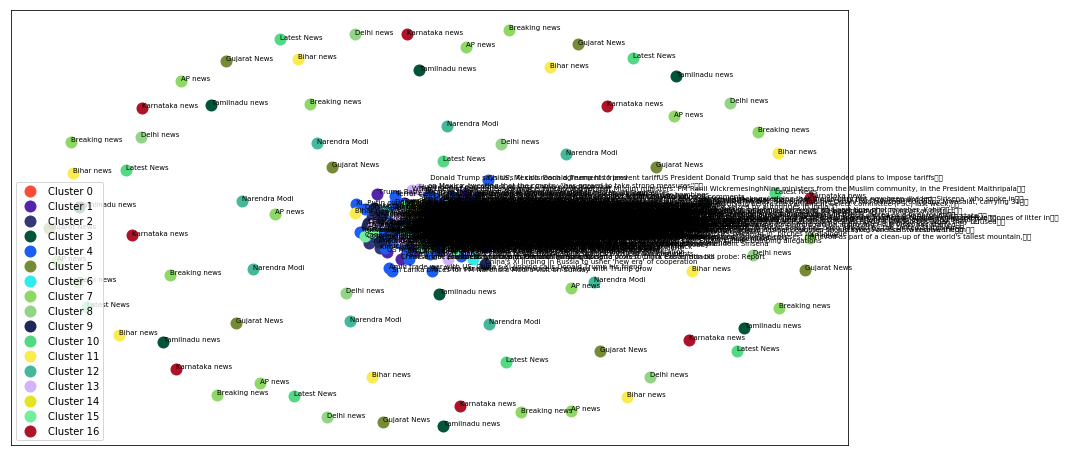

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [72]:
#centers = np.array(km.cluster_centers_)

In [73]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [74]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [75]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [76]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [77]:
#df.sort_values(by='Cluster')

In [78]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [79]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [80]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [81]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [82]:
#df_less

In [83]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [84]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [85]:
#Result

In [86]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [87]:
#df_more

In [88]:
#Result = Result.append(df_more)

In [89]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [90]:
##Result

In [91]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [92]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [93]:
df_sorted.head()

,Source,Heading,Category,Date,Time,URL,Cluster
0,Times of India,Sudan protesters to keep up campaign until mil...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0
1,Times of India,35 dead as Sudan troops move against democracy...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0
2,Times of India,Sudan protesters say sit-in site cleared by se...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0
3,Times of India,Sudan protesters remain defiant after deadly a...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0
4,Indian Express,"95 years ago, Everest was just as deadly but m...",world,2019-06-09,09:31:17,https://indianexpress.com/article/world/95-yea...,0


In [94]:
vectorizer = TfidfVectorizer()

In [95]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [96]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [97]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.11, 0.13, 0.11, 0.13, 0.09, 0.12, 0.11, 0.14, 0.09, 0.14, 0.15, 0.1, 0.1, 0.07, 0.08, 0.1]


[0.05, 0.07, 0.04, 0.06, 0.09, 0.07, 0.1, 0.09, 0.06, 0.06, 0.06, 0.05, 0.05, 0.08, 0.03, 0.07, 0.11, 0.05, 0.09, 0.09, 0.08, 0.06, 0.06, 0.07, 0.07, 0.04, 0.07, 0.05, 0.05, 0.05, 0.07, 0.06, 0.04, 0.09, 0.08, 0.09, 0.05, 0.06, 0.06, 0.05, 0.08, 0.08, 0.06, 0.11, 0.06, 0.07, 0.04]


[0.04, 0.03, 0.06, 0.03, 0.06, 0.02, 0.04, 0.04, 0.06, 0.06, 0.04, 0.03, 0.07, 0.05, 0.03, 0.03, 0.02, 0.06, 0.03, 0.04, 0.03, 0.05, 0.03, 0.03, 0.04, 0.02, 0.02, 0.07, 0.04, 0.05, 0.03, 0.05, 0.05, 0.02, 0.02, 0.05, 0.04, 0.03, 0.06, 0.06, 0.05, 0.03, 0.03, 0.06, 0.05, 0.03, 0.05, 0.05, 0.03, 0.07, 0.05, 0.04, 0.04, 0.03, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.04, 0.05, 0.05, 0.05, 0.02, 0.02, 0.06, 0.03]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[0.01, 0.01, 0.02, 0.02, 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.03, 0.01, 0.01, 0.03, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.03, 0.02, 0.02, 0.02,

In [98]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [99]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.110625
1     0.066383
2     0.040882
3     1.000000
4     0.018385
5     1.000000
6     0.066786
7     0.640000
8     1.000000
9     0.056383
10    1.000000
11    1.000000
12    1.000000
13    0.075000
14    0.098333
15    0.073793
16    1.000000
Name: cluster_similarity_value, dtype: float64

In [100]:
df_sorted

,Source,Heading,Category,Date,Time,URL,Cluster,cluster_similarity_value
0,Times of India,Sudan protesters to keep up campaign until mil...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0,0.11
1,Times of India,35 dead as Sudan troops move against democracy...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0,0.13
2,Times of India,Sudan protesters say sit-in site cleared by se...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0,0.11
3,Times of India,Sudan protesters remain defiant after deadly a...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0,0.13
4,Indian Express,"95 years ago, Everest was just as deadly but m...",world,2019-06-09,09:31:17,https://indianexpress.com/article/world/95-yea...,0,0.09
5,Times of India,"11,000 kg garbage, four dead bodies removed fr...",south asia,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/sout...,0,0.12
6,Times of India,Pakistan army says lawmakers critical of milit...,pakistan,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/paki...,0,0.11
7,India Today,"11,000 kg garbage, four dead bodies removed f...",world,2019-06-09,18:23,https://www.indiatoday.in/world/story/11-000-k...,0,0.14
8,Times of India,Wife of Iran presidential adviser shot dead at...,middle east,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/midd...,0,0.09
9,India Today,China in war of words with US over Tiananmen ...,world,2019-06-09,18:23,https://www.indiatoday.in/world/story/china-in...,0,0.14


In [101]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [102]:
col=df_sorted.columns

In [103]:
temp_more =[]
temp_less  =[]

In [104]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
            temp_less.append(cluster.iloc[i])
        else:
            temp_more.append(cluster.iloc[i])

In [105]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [106]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [107]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Source,Heading,Category,Date,Time,URL,Cluster,cluster_similarity_value
0,9,India Today,China in war of words with US over Tiananmen ...,world,2019-06-09,18:23,https://www.indiatoday.in/world/story/china-in...,0,0.14
1,36,Times of India,China paper cites drawn-out Korean War talks a...,china,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/chin...,1,0.08
2,129,Hindiustan Times,British PM Theresa May steps down as party lea...,world,2019-06-07,10:41:00,https://www.hindustantimes.com/world-news/brit...,2,0.06
3,137,Times of India,Tamilnadu news,middle east,2019-06-09,18:22,https://timesofindia.indiatimes.comhttps://tim...,3,1.00
4,203,Times of India,Donald Trump brings Brexit advice on state vis...,uk,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/uk/d...,4,0.03


In [108]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [109]:
Result = Result.append(df_less_similar)

In [110]:
Result = Result.sort_values(by='Cluster')

In [111]:
Result=Result.reset_index().drop(['index'],axis=1)

In [112]:
Result

,Source,Heading,Category,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,China in war of words with US over Tiananmen ...,world,2019-06-09,18:23,https://www.indiatoday.in/world/story/china-in...,0,0.14
1,Times of India,Sudan protesters say sit-in site cleared by se...,rest of world,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/rest...,0,0.11
2,Indian Express,"95 years ago, Everest was just as deadly but m...",world,2019-06-09,09:31:17,https://indianexpress.com/article/world/95-yea...,0,0.09
3,Times of India,Pakistan army says lawmakers critical of milit...,pakistan,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/paki...,0,0.11
4,Times of India,More than half of HIV patients in Pakistan's S...,pakistan,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/paki...,0,0.10
5,Times of India,Wife of Iran presidential adviser shot dead at...,middle east,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/midd...,0,0.09
6,Times of India,"Explosions in Nepal's capital leave 3 dead, 8 ...",south asia,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/sout...,0,0.10
7,Times of India,"As pressure for Afghan peace grows, drug threa...",south asia,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/sout...,0,0.07
8,Times of India,Syria flare-up leaves 83 fighters dead: monitor,middle east,2019-06-09,18:22,https://timesofindia.indiatimes.com/world/midd...,0,0.08
9,Times of India,Schools in Siberian town remain open even as t...,"mad, mad world",2019-06-09,18:22,https://timesofindia.indiatimes.com/world/mad-...,0,0.10


In [89]:
outname ='Technology-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Technology\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [90]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [91]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0,0.38
1,Hindiustan Times,Chinese database leaks 42.5 million records fr...,2019-05-30,12:52:00,https://www.hindustantimes.com/tech/chinese-da...,0,0.36
2,Hindiustan Times,"Spotify testing ‘Social Listening’, lets multi...",2019-06-01,16:49:00,https://www.hindustantimes.com/tech/spotify-te...,0,0.36
3,India Times,7 Features Of The Oppo Reno's Camera That May...,2019-06-03,14:44,https://www.indiatimes.com/technology/gadgets/...,1,0.18
4,Hindiustan Times,Xiaomi Mi Band 4 leaked images confirm colour ...,2019-06-01,16:34:00,https://www.hindustantimes.com/tech/xiaomi-mi-...,1,0.17
5,Time of India,Huawei Nova 5i with triple rear camera spotted...,2019-05-31,09:42:56,https://timesofindia.indiatimes.com/gadgets-ne...,1,0.16
6,Hindiustan Times,"Moto Z4 with 48MP camera, Snapdragon 675 SoC l...",2019-05-31,12:54:00,https://www.hindustantimes.com/tech/moto-z4-wi...,1,0.17
7,Indian Express,"Oppo, Xiaomi show off smartphones with under-d...",2019-06-03,2:18:21 pm,https://indianexpress.com/article/technology/m...,1,0.36
8,India Today,"Galaxy S10: Launch, Expected Specs, Price and...",2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,2,0.27
9,Time of India,"MacBook Pro reportedly explodes, battery may b...",2019-06-01,03:16:41,https://timesofindia.indiatimes.com/gadgets-ne...,2,0.19
